# Data Preprocessing

The goal of this notebook is to prepare a csv file for ML modeling. This includes the following:
1. one-hot encoding of categories
2. Scaling features
3. split into train/test pools

# Initial data relook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('MN_Housing_EDA.csv')
df.head(5)

,PROPERTY TYPE,ADDRESS,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,MLS#,LATITUDE,LONGITUDE,BED_BIN,BATH_BIN
0,Townhouse,1006 Van White Memorial Blvd,Minneapolis,55411.0,334900.0,3.0,3.0,Sumner - Glenwood,1505.0,1306.0,2015,1,223.0,279.0,6678953.0,44.988599,-93.291941,3-5 Beds,3-4 Baths
1,Condo/Co-op,1211 Lagoon Ave #410,Minneapolis,55408.0,219900.0,1.0,1.0,Lowry Hill East,818.0,23391.0,2006,4,269.0,376.0,6762787.0,44.948981,-93.294965,<3 Beds,<3 Baths
2,Single Family Residential,9532 Yosemite Rd,Bloomington,55437.0,649900.0,4.0,5.0,Bloomington,3492.0,19166.0,1974,15,186.0,0.0,6752088.0,44.830344,-93.355163,3-5 Beds,3-4 Baths
3,Condo/Co-op,3251 Louisiana Ave S #201,Saint Louis Park,55426.0,424900.0,2.0,2.0,Saint Louis Park,1670.0,126890.0,2007,36,254.0,811.0,6744587.0,44.942344,-93.369518,<3 Beds,<3 Baths
4,Townhouse,1315 Douglas Dr N,Golden Valley,55422.0,280000.0,3.0,2.0,Golden Valley,1364.0,139304.0,1966,44,205.0,375.0,6739597.0,44.993391,-93.360514,3-5 Beds,3-4 Baths


In [3]:
# double check for nulls
df.isnull().sum()

PROPERTY TYPE         0
ADDRESS               0
CITY                  0
ZIP OR POSTAL CODE    0
PRICE                 0
BEDS                  0
BATHS                 0
LOCATION              0
SQUARE FEET           0
LOT SIZE              0
YEAR BUILT            0
DAYS ON MARKET        0
$/SQUARE FEET         0
HOA/MONTH             0
MLS#                  0
LATITUDE              0
LONGITUDE             0
BED_BIN               0
BATH_BIN              0
dtype: int64

In [4]:
df.dtypes

PROPERTY TYPE          object
ADDRESS                object
CITY                   object
ZIP OR POSTAL CODE    float64
PRICE                 float64
BEDS                  float64
BATHS                 float64
LOCATION               object
SQUARE FEET           float64
LOT SIZE              float64
YEAR BUILT              int64
DAYS ON MARKET          int64
$/SQUARE FEET         float64
HOA/MONTH             float64
MLS#                  float64
LATITUDE              float64
LONGITUDE             float64
BED_BIN                object
BATH_BIN               object
dtype: object

In [5]:
df['ZIP OR POSTAL CODE'] = df['ZIP OR POSTAL CODE'].astype(float).astype(int).astype(str)
df.dtypes

PROPERTY TYPE          object
ADDRESS                object
CITY                   object
ZIP OR POSTAL CODE     object
PRICE                 float64
BEDS                  float64
BATHS                 float64
LOCATION               object
SQUARE FEET           float64
LOT SIZE              float64
YEAR BUILT              int64
DAYS ON MARKET          int64
$/SQUARE FEET         float64
HOA/MONTH             float64
MLS#                  float64
LATITUDE              float64
LONGITUDE             float64
BED_BIN                object
BATH_BIN               object
dtype: object

In [6]:
# MLS, address, latitude, and longitude will be removed as they are unique to the specific property and could all be used as identifiers and won't help model
df_clean = df.drop(columns=['MLS#','ADDRESS', 'LATITUDE', 'LONGITUDE'])
df_clean.head(5)

,PROPERTY TYPE,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,BED_BIN,BATH_BIN
0,Townhouse,Minneapolis,55411,334900.0,3.0,3.0,Sumner - Glenwood,1505.0,1306.0,2015,1,223.0,279.0,3-5 Beds,3-4 Baths
1,Condo/Co-op,Minneapolis,55408,219900.0,1.0,1.0,Lowry Hill East,818.0,23391.0,2006,4,269.0,376.0,<3 Beds,<3 Baths
2,Single Family Residential,Bloomington,55437,649900.0,4.0,5.0,Bloomington,3492.0,19166.0,1974,15,186.0,0.0,3-5 Beds,3-4 Baths
3,Condo/Co-op,Saint Louis Park,55426,424900.0,2.0,2.0,Saint Louis Park,1670.0,126890.0,2007,36,254.0,811.0,<3 Beds,<3 Baths
4,Townhouse,Golden Valley,55422,280000.0,3.0,2.0,Golden Valley,1364.0,139304.0,1966,44,205.0,375.0,3-5 Beds,3-4 Baths


In [7]:
# $ per square foot will be dropped due to an overlap with the y value (price). 
df_clean = df_clean.drop(columns=['$/SQUARE FEET'])
df_clean.head(5)

,PROPERTY TYPE,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,HOA/MONTH,BED_BIN,BATH_BIN
0,Townhouse,Minneapolis,55411,334900.0,3.0,3.0,Sumner - Glenwood,1505.0,1306.0,2015,1,279.0,3-5 Beds,3-4 Baths
1,Condo/Co-op,Minneapolis,55408,219900.0,1.0,1.0,Lowry Hill East,818.0,23391.0,2006,4,376.0,<3 Beds,<3 Baths
2,Single Family Residential,Bloomington,55437,649900.0,4.0,5.0,Bloomington,3492.0,19166.0,1974,15,0.0,3-5 Beds,3-4 Baths
3,Condo/Co-op,Saint Louis Park,55426,424900.0,2.0,2.0,Saint Louis Park,1670.0,126890.0,2007,36,811.0,<3 Beds,<3 Baths
4,Townhouse,Golden Valley,55422,280000.0,3.0,2.0,Golden Valley,1364.0,139304.0,1966,44,375.0,3-5 Beds,3-4 Baths


In [8]:
df_clean.nunique()

PROPERTY TYPE           5
CITY                   20
ZIP OR POSTAL CODE     54
PRICE                 297
BEDS                   13
BATHS                   7
LOCATION              101
SQUARE FEET           574
LOT SIZE              241
YEAR BUILT            130
DAYS ON MARKET         40
HOA/MONTH             166
BED_BIN                 3
BATH_BIN                3
dtype: int64

looks like there is an issue with city, zip, and location. city likely contains zips whichh contains locations. Considering the total of ~ 600 data points, it looks like city may be the best to move forward in order to reduce the amount of exgtra columns and still having varying regions.

In [9]:
df_clean = df_clean.drop(columns=['ZIP OR POSTAL CODE', 'LOCATION'])

In [10]:
df_clean.head(5)

,PROPERTY TYPE,CITY,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,HOA/MONTH,BED_BIN,BATH_BIN
0,Townhouse,Minneapolis,334900.0,3.0,3.0,1505.0,1306.0,2015,1,279.0,3-5 Beds,3-4 Baths
1,Condo/Co-op,Minneapolis,219900.0,1.0,1.0,818.0,23391.0,2006,4,376.0,<3 Beds,<3 Baths
2,Single Family Residential,Bloomington,649900.0,4.0,5.0,3492.0,19166.0,1974,15,0.0,3-5 Beds,3-4 Baths
3,Condo/Co-op,Saint Louis Park,424900.0,2.0,2.0,1670.0,126890.0,2007,36,811.0,<3 Beds,<3 Baths
4,Townhouse,Golden Valley,280000.0,3.0,2.0,1364.0,139304.0,1966,44,375.0,3-5 Beds,3-4 Baths


In [11]:
# finally will remove both the bed bin and bath bin as its redundant with beds and baths
df_clean = df_clean.drop(columns=['BED_BIN', 'BATH_BIN'])

In [12]:
df_clean.head(5)

,PROPERTY TYPE,CITY,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,HOA/MONTH
0,Townhouse,Minneapolis,334900.0,3.0,3.0,1505.0,1306.0,2015,1,279.0
1,Condo/Co-op,Minneapolis,219900.0,1.0,1.0,818.0,23391.0,2006,4,376.0
2,Single Family Residential,Bloomington,649900.0,4.0,5.0,3492.0,19166.0,1974,15,0.0
3,Condo/Co-op,Saint Louis Park,424900.0,2.0,2.0,1670.0,126890.0,2007,36,811.0
4,Townhouse,Golden Valley,280000.0,3.0,2.0,1364.0,139304.0,1966,44,375.0


Data looks good and is ready to be split for categorical and numerical datasets. 

In [13]:
MN_num = df_clean[['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', 'HOA/MONTH']]
MN_cat = df_clean[['PROPERTY TYPE', 'CITY']]

Next is to one-hot encode the MN_cat

In [14]:
OH_Encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [15]:
MN_OH_cat = OH_Encoder.fit_transform(MN_cat)

In [16]:
encoded_cols = OH_Encoder.get_feature_names_out(['PROPERTY TYPE', 'CITY'])
MN_cat_encoded = pd.DataFrame(MN_OH_cat, columns=encoded_cols, index=MN_cat.index)

In [17]:
MN_cat_encoded.head(5)

,PROPERTY TYPE_Condo/Co-op,PROPERTY TYPE_Multi-Family (2-4 Unit),PROPERTY TYPE_Other,PROPERTY TYPE_Single Family Residential,PROPERTY TYPE_Townhouse,CITY_Bloomington,CITY_Brooklyn Center,CITY_Brooklyn Park,CITY_Columbia Heights,CITY_Crystal,...,CITY_New Hope,CITY_Richfield,CITY_Robbinsdale,CITY_Saint Anthony,CITY_Saint Louis Park,CITY_Saint Paul,CITY_Spring Lake Park,CITY_West Saint Paul,CITY_White Bear Lake,CITY_White Bear Twp
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
MN_cat_encoded.shape

(686, 25)

In [19]:
df_combined = pd.concat([MN_num, MN_cat_encoded], axis=1)

In [20]:
df_combined.head(5)

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,HOA/MONTH,PROPERTY TYPE_Condo/Co-op,PROPERTY TYPE_Multi-Family (2-4 Unit),...,CITY_New Hope,CITY_Richfield,CITY_Robbinsdale,CITY_Saint Anthony,CITY_Saint Louis Park,CITY_Saint Paul,CITY_Spring Lake Park,CITY_West Saint Paul,CITY_White Bear Lake,CITY_White Bear Twp
0,334900.0,3.0,3.0,1505.0,1306.0,2015,1,279.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,219900.0,1.0,1.0,818.0,23391.0,2006,4,376.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,649900.0,4.0,5.0,3492.0,19166.0,1974,15,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,424900.0,2.0,2.0,1670.0,126890.0,2007,36,811.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,280000.0,3.0,2.0,1364.0,139304.0,1966,44,375.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# should remove some outliers, especially from the Square feet. This will be done by removing all points outside of 3 standard deviations

SF_mean = df_combined['SQUARE FEET'].mean()
SF_std = df_combined['SQUARE FEET'].std()
upperlimit = SF_mean + (SF_std * 3)
lowerlimit = SF_mean - (SF_std * 3)

In [22]:
df_combined_SFoutliers = df_combined[(df_combined['SQUARE FEET'] < upperlimit) & 
                                     (df_combined['SQUARE FEET'] > lowerlimit)].copy()

In [23]:
df_combined_SFoutliers.shape

(678, 33)

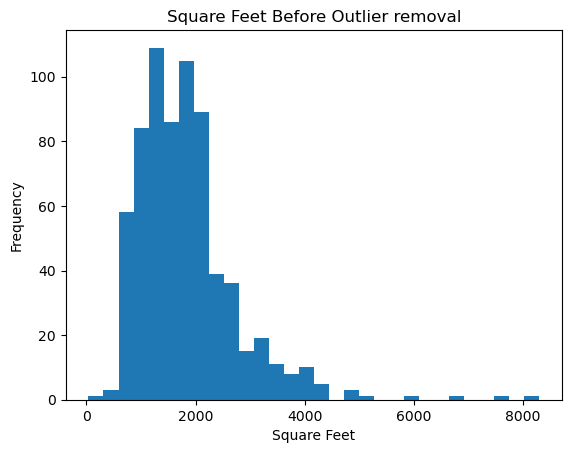

In [24]:
plt.hist(df_combined['SQUARE FEET'], bins=30)
plt.xlabel('Square Feet')
plt.ylabel('Frequency')
plt.title('Square Feet Before Outlier removal')
plt.show()

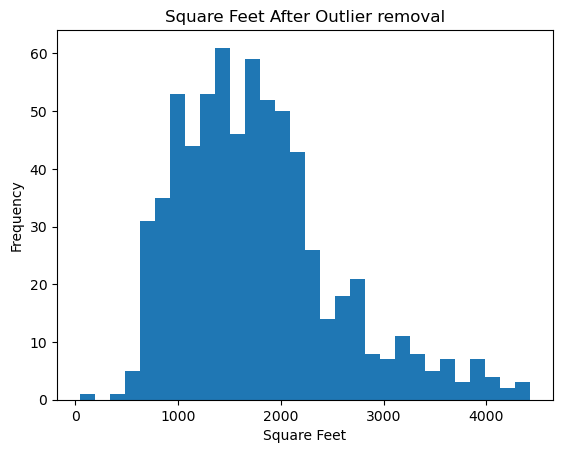

In [25]:
plt.hist(df_combined_SFoutliers['SQUARE FEET'], bins=30)
plt.xlabel('Square Feet')
plt.ylabel('Frequency')
plt.title('Square Feet After Outlier removal')
plt.show()

Looks like clear outliers were removed from the square feet data with only 8 data points removed. Will do the same for lot size

In [26]:
LS_mean = df_combined_SFoutliers['LOT SIZE'].mean()
LS_std = df_combined_SFoutliers['LOT SIZE'].std()
upperlimit = LS_mean + (LS_std * 3)
lowerlimit = LS_mean - (LS_std * 3)

df_combined_out = df_combined_SFoutliers[(df_combined_SFoutliers['LOT SIZE'] < upperlimit) & 
                                     (df_combined_SFoutliers['LOT SIZE'] > lowerlimit)].copy()

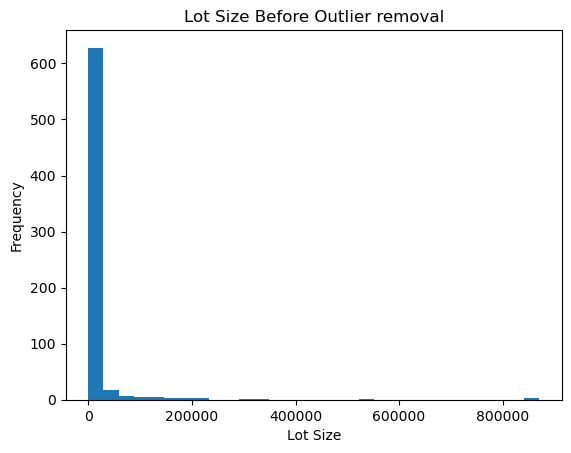

In [27]:
plt.hist(df_combined_SFoutliers['LOT SIZE'], bins=30)
plt.xlabel('Lot Size')
plt.ylabel('Frequency')
plt.title('Lot Size Before Outlier removal')
plt.show()

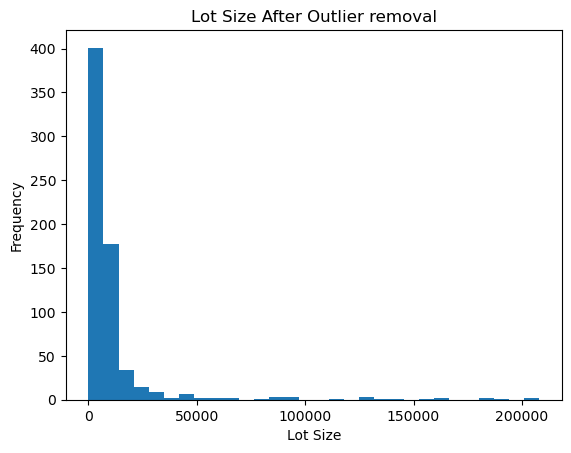

In [28]:
plt.hist(df_combined_out['LOT SIZE'], bins=30)
plt.xlabel('Lot Size')
plt.ylabel('Frequency')
plt.title('Lot Size After Outlier removal')
plt.show()

In [29]:
df_combined_out.shape

(671, 33)

Will keep the outliers removed because it removes things like ranches and mansions which may affect the regression modelling. Also, ~98% of the data still exists

In [30]:
MN_num_X = df_combined_out[['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', 'HOA/MONTH']]
cols = df_combined_out.columns.difference(MN_num_X.columns)
MN_OH_X = df_combined_out[cols]

Next step is for scaling. A standard scaler will be used, and if needed, i can come back and use a log scale for something like LOT SIZE

In [31]:
scaler = StandardScaler()
scaler.set_output(transform="pandas")
MN_num_scaled = scaler.fit_transform(MN_num_X)

In [32]:
MN_num_scaled.head(5)

,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,HOA/MONTH
0,-0.130194,1.042857,-0.355115,-0.423733,1.727826,-0.841401,0.285985
1,-1.662827,-1.175073,-1.244596,0.459637,1.494160,-0.548467,0.558652
2,0.636123,3.260787,2.217516,0.290642,0.663349,0.525621,-0.498285
3,-0.896510,-0.066108,-0.141485,4.599456,1.520123,2.576153,1.781438
4,-0.130194,-0.066108,-0.537672,5.095999,0.455646,3.357308,0.555841


In [33]:
MN_ALL = pd.concat([MN_num_scaled, MN_OH_X], axis=1)
MN_ALL.head(5)

,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,HOA/MONTH,CITY_Bloomington,CITY_Brooklyn Center,CITY_Brooklyn Park,...,CITY_Spring Lake Park,CITY_West Saint Paul,CITY_White Bear Lake,CITY_White Bear Twp,PRICE,PROPERTY TYPE_Condo/Co-op,PROPERTY TYPE_Multi-Family (2-4 Unit),PROPERTY TYPE_Other,PROPERTY TYPE_Single Family Residential,PROPERTY TYPE_Townhouse
0,-0.130194,1.042857,-0.355115,-0.423733,1.727826,-0.841401,0.285985,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,334900.0,0.0,0.0,0.0,0.0,1.0
1,-1.662827,-1.175073,-1.244596,0.459637,1.494160,-0.548467,0.558652,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,219900.0,1.0,0.0,0.0,0.0,0.0
2,0.636123,3.260787,2.217516,0.290642,0.663349,0.525621,-0.498285,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,649900.0,0.0,0.0,0.0,1.0,0.0
3,-0.896510,-0.066108,-0.141485,4.599456,1.520123,2.576153,1.781438,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,424900.0,1.0,0.0,0.0,0.0,0.0
4,-0.130194,-0.066108,-0.537672,5.095999,0.455646,3.357308,0.555841,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,280000.0,0.0,0.0,0.0,0.0,1.0


All data has been scaled appropriately and next is to form the train/test split (80/20)

In [34]:
y = MN_ALL[['PRICE']]
X = MN_ALL.drop(columns='PRICE')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [35]:
X_train.shape

(536, 32)

In [36]:
X_test.shape

(135, 32)

In [37]:
y_train.shape

(536, 1)

In [38]:
y_test.shape

(135, 1)

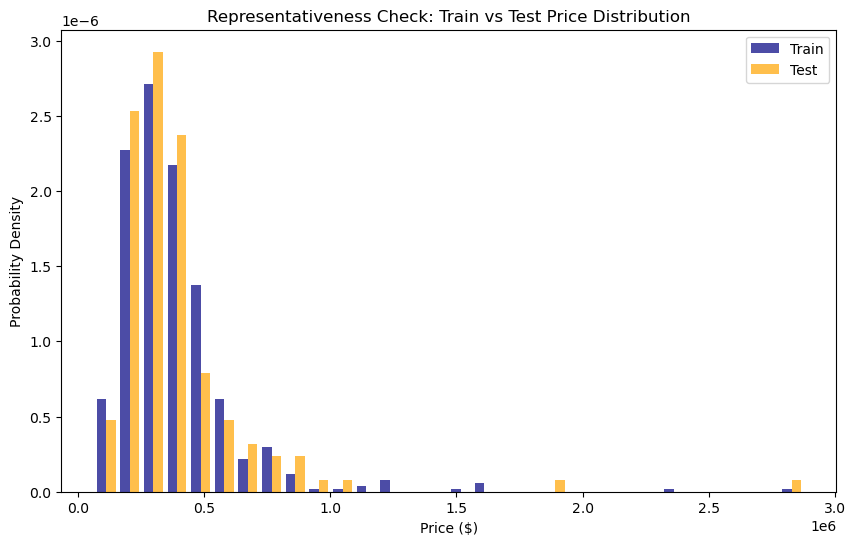

In [39]:
y_train_flat = y_train.values.flatten()
y_test_flat = y_test.values.flatten()

# Use density=True to compare the SHAPE (since Train is much larger than Test)
plt.figure(figsize=(10, 6))
plt.hist([y_train_flat, y_test_flat], bins=30, label=['Train', 'Test'], 
         density=True, alpha=0.7, color=['navy', 'orange'])

plt.xlabel('Price ($)')
plt.ylabel('Probability Density')
plt.title('Representativeness Check: Train vs Test Price Distribution')
plt.legend()
plt.show()


# Next steps: ML Modeling

In order to find the best model, multiple models will be used including 1 neural network

1. Linear model
2. Random Forest
3. XGBoost
4. Pytorch

In [77]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ----- ---------------------------------- 10.7/72.0 MB 65.7 MB/s eta 0:00:01
   -------------- ------------------------- 26.2/72.0 MB 71.8 MB/s eta 0:00:01
   ------------------------- -------------- 45.1/72.0 MB 79.4 MB/s eta 0:00:01
   --------------------------------- ------ 60.6/72.0 MB 79.6 MB/s eta 0:00:01
   ---------------------------------------  71.8/72.0 MB 77.0 MB/s eta 0:00:01
   ---------------------------------------  71.8/72.0 MB 77.0 MB/s eta 0:00:01
   ---------------------------------------- 72.0/72.0 MB 55.3 MB/s eta 0:00:00


In [90]:
!pip install torch torchvision

   ---------------------------------------- 0.0/113.8 MB ? eta -:--:--
   --- ------------------------------------ 10.0/113.8 MB 57.7 MB/s eta 0:00:02
   ------ --------------------------------- 19.4/113.8 MB 63.5 MB/s eta 0:00:02
   ----------- ---------------------------- 33.3/113.8 MB 57.6 MB/s eta 0:00:02
   --------------- ------------------------ 44.8/113.8 MB 58.5 MB/s eta 0:00:02
   ------------------- -------------------- 56.6/113.8 MB 57.3 MB/s eta 0:00:01
   ----------------------- ---------------- 67.1/113.8 MB 56.3 MB/s eta 0:00:01
   --------------------------- ------------ 78.6/113.8 MB 56.7 MB/s eta 0:00:01
   ------------------------------- -------- 89.1/113.8 MB 55.9 MB/s eta 0:00:01
   ---------------------------------- ---- 100.9/113.8 MB 56.1 MB/s eta 0:00:01
   --------------------------------------  111.7/113.8 MB 55.8 MB/s eta 0:00:01
   --------------------------------------  113.5/113.8 MB 55.8 MB/s eta 0:00:01
   --------------------------------------- 113.8/

In [91]:
# already have numpy
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

# random forest regression
from sklearn.ensemble import RandomForestRegressor

# XGBoost
import xgboost as xgb

# pytorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# parameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn.metrics import mean_absolute_error, r2_score

# random state for all
RS = 52

# Linear Regression Modeling

In [41]:
# instatiate model
line = LinearRegression().fit(X_train, y_train)

In [42]:
# comparing metrics for the training and test sets

train_pred = line.predict(X_train)
test_pred = line.predict(X_test)

# MAE and R^2 for training set

train_MAE = mean_absolute_error(y_train, train_pred)
train_R2 = r2_score(y_train, train_pred)

# MAE and R^2 for test set

test_MAE = mean_absolute_error(y_test, test_pred)
test_R2 = r2_score(y_test, test_pred)

# printing values

print(f'Training Mean Absolute Error: ${train_MAE:,.2f}')
print('Training R^2: ' + str(round(train_R2,2)))
print(f'Test Mean Absolute Error: ${test_MAE:,.2f}')
print('Test R^2: ' + str(round(test_R2,2)))

Training Mean Absolute Error: $97,398.16
Training R^2: 0.59
Test Mean Absolute Error: $97,564.04
Test R^2: 0.59


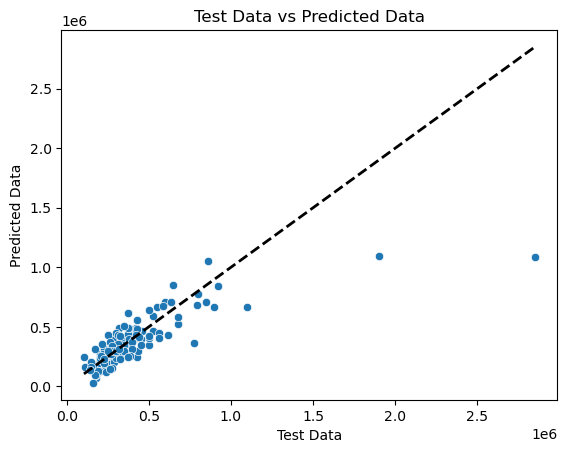

In [43]:
# predicted vs actual plot for test data
x_values = y_test.values.ravel() 
y_values = test_pred.ravel()

sns.scatterplot(x=x_values, y=y_values)
plt.title('Test Data vs Predicted Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Test Data')
plt.ylabel('Predicted Data')
plt.show()
        

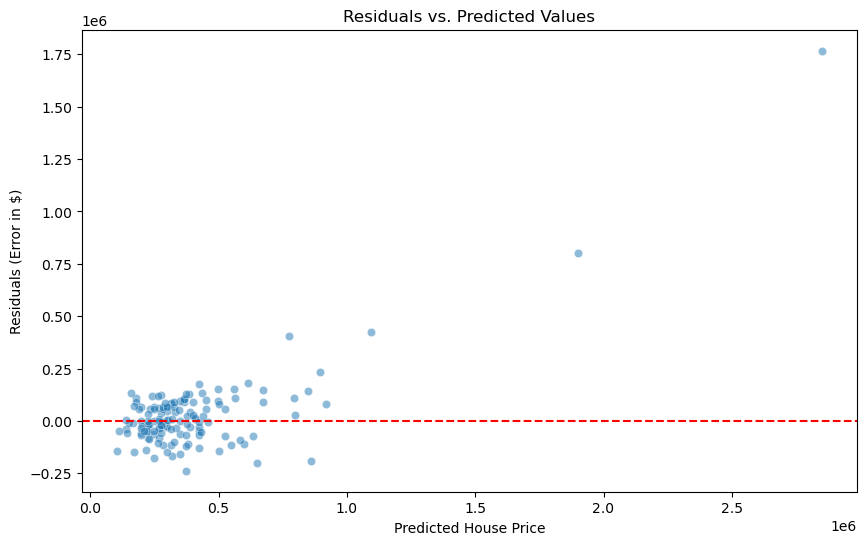

In [44]:

residuals_linear = x_values - y_values

plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_values, y=residuals_linear, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--') # The "zero error" line

plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted House Price')
plt.ylabel('Residuals (Error in $)')
plt.show()

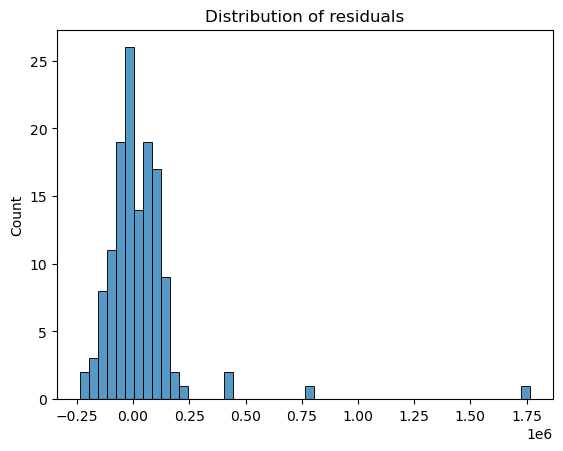

In [45]:
sns.histplot(residuals_linear, bins = 50)
plt.title('Distribution of residuals')
plt.show()

In [46]:
# next will test Ridge linear regression

# set up range of alphas for optimization
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100, 1000, 10000]

# create an instance for the ridge fit
ridge_optimized = RidgeCV(alphas=alphas, cv=5)
ridge_optimized.fit(X_train, y_train)

print(f"Optimal alpha for MN housing data {ridge_optimized.alpha_}")

Optimal alpha for MN housing data 100.0


In [47]:
# next to use a fine search for an optimized value. looks to be between 50-1000. 
fine_alphas = np.linspace(50, 150, 100) # 100 points between 50 and 150

ridge_fine = RidgeCV(alphas=fine_alphas, cv=5)
ridge_fine.fit(X_train, y_train)

print(f"Exact optimized alpha: {ridge_fine.alpha_}")

Exact optimized alpha: 77.27272727272728


In [48]:
# original linear model likely was overfit due to colinearity
# now to look at the ridge fit

ridge_pred_train = ridge_fine.predict(X_train)
ridge_pred_test = ridge_fine.predict(X_test)

ridge_train_MAE = mean_absolute_error(y_train, ridge_pred_train)
ridge_train_R2 = r2_score(y_train, ridge_pred_train)

ridge_test_MAE = mean_absolute_error(y_test, ridge_pred_test)
ridge_test_R2 = r2_score(y_test, ridge_pred_test)

print(f'Training Mean Absolute Error: ${ridge_train_MAE:,.2f}')
print('Training R^2: ' + str(round(ridge_train_R2,2)))
print(f'Test Mean Absolute Error: ${ridge_test_MAE:,.2f}')
print('Test R^2: ' + str(round(ridge_test_R2,2)))

Training Mean Absolute Error: $95,269.60
Training R^2: 0.54
Test Mean Absolute Error: $97,064.80
Test R^2: 0.54


In [49]:
# this is still huge mean absolute error. Instead of graphing, I'll just move toward the lasso method.

lasso_final = LassoCV(cv=5, random_state=RS, max_iter=10000)
lasso_final.fit(X_train, y_train)

lasso_pred_test = lasso_final.predict(X_test)

print(f"Lasso Mean Absolute Error : ${mean_absolute_error(y_test, lasso_pred_test):,.2f}")
print(f"Lasso R2: {lasso_final.score(X_test, y_test):.2f}")
print(f"Features Kept: {np.sum(lasso_final.coef_ != 0)} out of {len(lasso_final.coef_)}")

Lasso Mean Absolute Error : $99,223.64
Lasso R2: 0.57
Features Kept: 9 out of 32


C:\Users\benpe\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Linear fit is not getting better. Will try to use a log fit next. 

# Random Forest Modeling

In [50]:
# flattening the y valriables

flat_y_train = y_train.values.ravel()
flat_y_test = y_test.values.ravel()

In [51]:
# trying a basic random forest first
rf_model = RandomForestRegressor(n_estimators=100, random_state=RS)
rf_model_fit = rf_model.fit(X_train, flat_y_train)

In [52]:
rf_test_pred = rf_model_fit.predict(X_test)
flat_rf_test_pred = rf_test_pred.flatten()

In [53]:
print(f"RF Mean Absolute Error: ${mean_absolute_error(flat_y_test, flat_rf_test_pred):,.2f}")
print(f"RF R^2: {r2_score(flat_y_test, flat_rf_test_pred):,.2f}")

RF Mean Absolute Error: $101,348.49
RF R^2: 0.54


In [54]:
# will simplify the trees and increase the # of trees
rf_model_2 = RandomForestRegressor(n_estimators=1000, 
                                   random_state=RS,
                                   max_depth = 10,
                                   min_samples_split = 5)
rf_model_fit_2 = rf_model_2.fit(X_train, flat_y_train)


In [55]:
rf_test_pred_2 = rf_model_fit_2.predict(X_test)
flat_rf_test_pred_2 = rf_test_pred_2.flatten()

In [56]:
print(f"RF Mean Absolute Error: ${mean_absolute_error(flat_y_test, flat_rf_test_pred_2):,.2f}")
print(f"RF R^2: {r2_score(flat_y_test, flat_rf_test_pred_2):,.2f}")

RF Mean Absolute Error: $98,422.34
RF R^2: 0.55


Quick changes didn't actually improve the model at all. Next step is to try a random seach followed by a grid search

In [59]:
# will start with a randomized search

rand_param_dist = {
    'n_estimators': np.arange(100, 2000, 100),
    'max_depth': [None] + list(np.arange(2,50,5)),
    'min_samples_split': np.arange(2,20,1),
    'min_samples_leaf': np.arange(1,20,1),
    'max_features':['sqrt', 'log2', None, 0.5]
}

rf_random = RandomizedSearchCV(
    estimator = RandomForestRegressor(random_state=RS),
    param_distributions=rand_param_dist,
    n_iter = 100,
    scoring = 'neg_mean_absolute_error',
    verbose=2,
    random_state=RS,
    n_jobs=-1
)

rf_random.fit(X_train, flat_y_train)

print(f"Best Params found via Random Search: {rf_random.best_params_}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Params found via Random Search: {'n_estimators': np.int64(1900), 'min_samples_split': np.int64(2), 'min_samples_leaf': np.int64(1), 'max_features': 'log2', 'max_depth': np.int64(22)}


In [61]:
rf_random_model = rf_random.best_estimator_
rf_random_pred = rf_random_model.predict(X_test)

rf_random_mae = mean_absolute_error(flat_y_test, rf_random_pred)
rf_random_r2 = r2_score(flat_y_test, rf_random_pred)

print(f"RF Random Tuned RF MAE: ${rf_random_mae:,.2f}")
print(f"RF Random Tuned RF R2: {rf_random_r2:.4f}")

RF Random Tuned RF MAE: $89,829.39
RF Random Tuned RF R2: 0.5881


In [67]:
# now to narrow it down further

grid_param_dist = {
    'n_estimators': [1700, 1800, 1900, 2000],
    'max_depth': [19, 20, 21, 22, 23, 24],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2,3],
    'max_features':['log2']
}

rf_grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=RS),
    param_grid=grid_param_dist,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, flat_y_train)

print(f"Absolute Best Params: {rf_grid.best_params_}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Absolute Best Params: {'max_depth': 21, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1800}


In [68]:
grid_param_dist = {
    'n_estimators': [1700, , 1800, 1850, 1900],
    'max_depth': [19, 20, 21, 22, 23, 24],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2,3],
    'max_features':['log2']
}

rf_grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=RS),
    param_grid=grid_param_dist,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, flat_y_train)

print(f"Absolute Best Params: {rf_grid.best_params_}")

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Absolute Best Params: {'max_depth': 21, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1750}


In [74]:
final_rf = rf_grid.best_estimator_
rf_pred_final = rf_grid.predict(X_test)

rf_final_mae = mean_absolute_error(flat_y_test, rf_pred_final)
rf_final_r2 = r2_score(flat_y_test, rf_pred_final)

print(f"RF Final Tuned RF MAE: ${rf_final_mae:,.2f}")
print(f"RF Final Tuned RF R2: {rf_final_r2:.4f}")

RF Final Tuned RF MAE: $90,572.98
RF Final Tuned RF R2: 0.5842


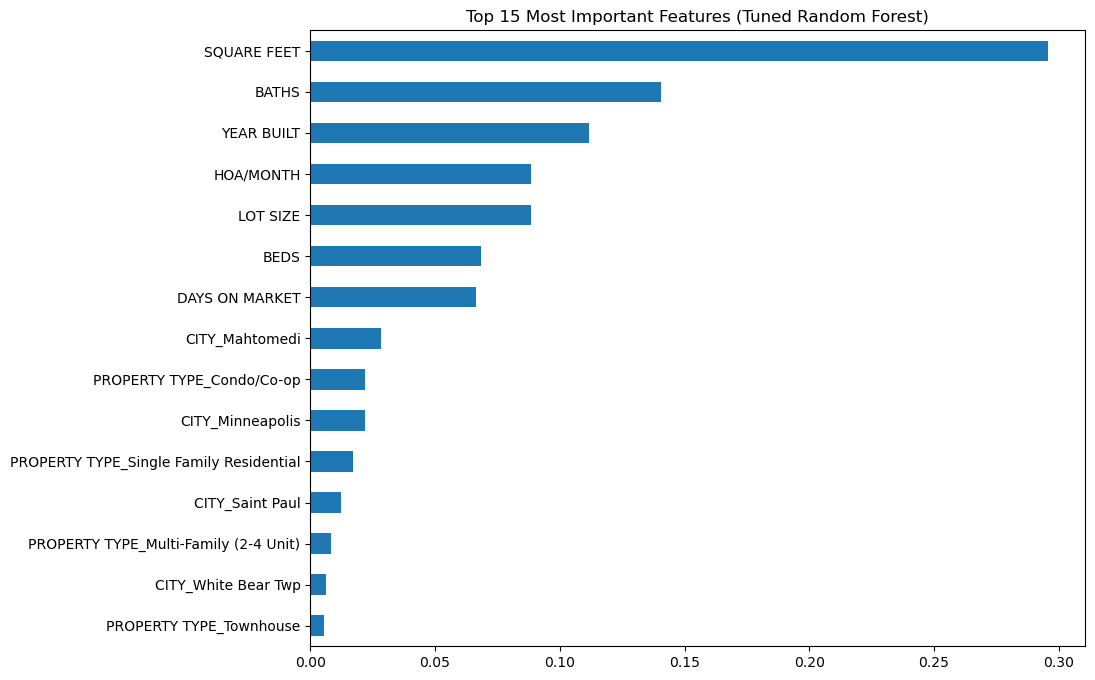

In [75]:
# the random parameters were actually better liekly due to overfitting. 
# will use the random values for final analysis for the random forest.

importances = rf_random_model.feature_importances_
feature_names = X_train.columns
rf_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
rf_importances.head(15).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 15 Most Important Features (Tuned Random Forest)')
plt.show()

# XGBoost Modeling

In [82]:
# will optimize using a randomized parameter search

xgb_params = {
    'n_estimators': [500, 1000, 1500, 2000],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'max_depth': [2, 3, 4, 5, 7, 9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.5, 1, 1.5]
}


xgb_model = xgb.XGBRegressor(objective='reg:absoluteerror', random_state=RS)
xgb_random = RandomizedSearchCV(
    estimator = xgb_model,
    param_distributions = xgb_params,
    n_iter=100,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1,
    random_state=RS
)

xgb_random.fit(X_train, flat_y_train)

print(f"Best XGB Params: {xgb_random.best_params_}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best XGB Params: {'subsample': 0.7, 'n_estimators': 2000, 'max_depth': 2, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.8}


In [84]:
# Grab the champion
best_xgb_model = xgb_random.best_estimator_
xgb_final_preds = best_xgb_model.predict(X_test)

final_xgb_mae = mean_absolute_error(flat_y_test, xgb_final_preds)
final_xgb_r2 = r2_score(flat_y_test, xgb_final_preds)652333

print(f"XGBoost Final MAE: ${final_xgb_mae:,.2f}")
print(f"XGBoost Final R2: {final_xgb_r2:.4f}")

XGBoost Final MAE: $85,474.70
XGBoost Final R2: 0.5824


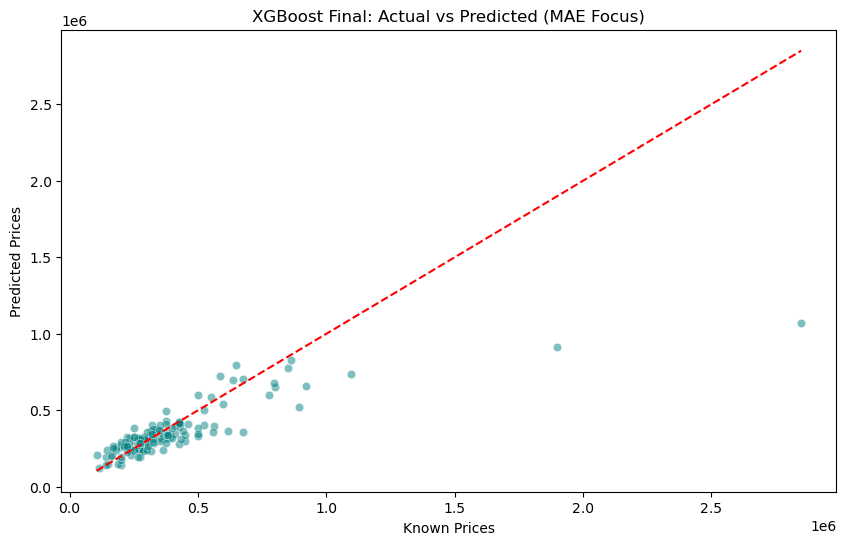

In [86]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=flat_y_test, y=xgb_final_preds, alpha=0.5, color='teal')
plt.plot([flat_y_test.min(), flat_y_test.max()], [flat_y_test.min(), flat_y_test.max()], '--r')
plt.title('XGBoost Final: Actual vs Predicted (MAE Focus)')
plt.xlabel('Known Prices')
plt.ylabel('Predicted Prices')
plt.show()

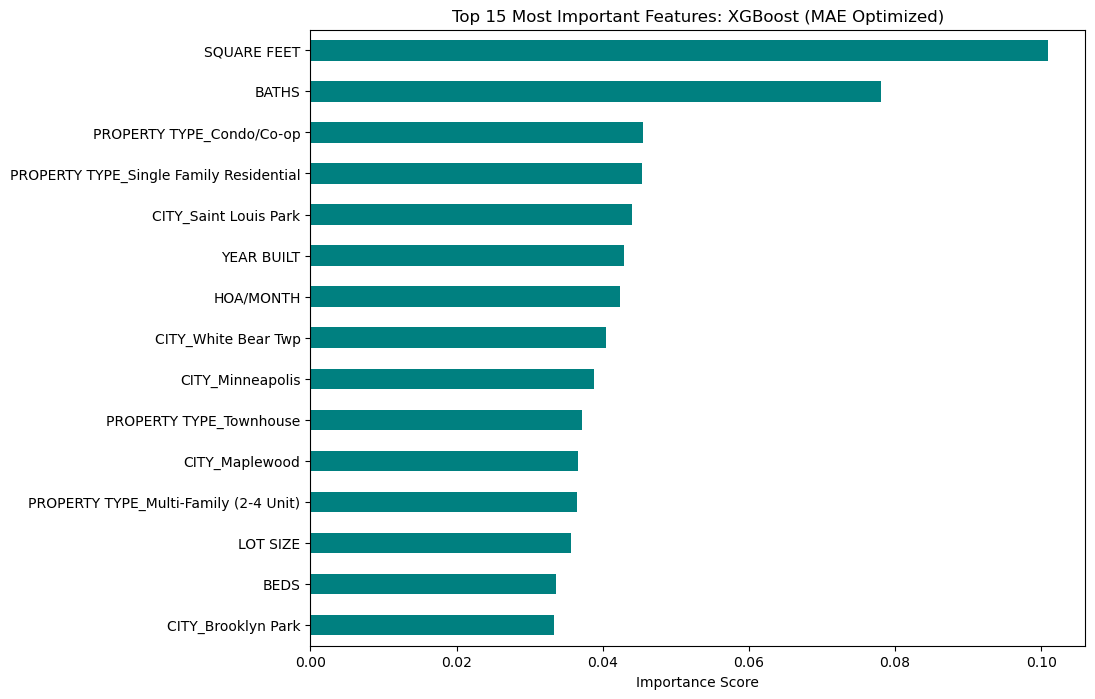

In [88]:
importances_xgb = best_xgb_model.feature_importances_
feature_names = X_train.columns

xgb_importances = pd.Series(importances_xgb, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
xgb_importances.head(15).plot(kind='barh', color='teal')
plt.gca().invert_yaxis()  # Put the most important at the top
plt.title('Top 15 Most Important Features: XGBoost (MAE Optimized)')
plt.xlabel('Importance Score')
plt.show()

In [87]:
# still the R2 is low mostly due to outliers. Maybe a combination approach will work.

# Pytorch Modeling

In [ ]:
# currently working on this. First reading about it. Currently XGBoost is winning